In [1]:
library(data.table)
library(ggplot2)

In [2]:
cellranger_dir = "/directflow/GWCCGPipeline/projects/deliver/GIMR_GWCCG_230201_JOSPOW_10x_Tenk10k/"

In [4]:
# use cellbender results just to get all samples in one place
cellbender_dir = "/directflow/SCCGGroupShare/projects/anncuo/TenK10K_pilot/tenk10k/data_processing/cellbender_output_smaller_learning_rate/"
samples = list.files(cellbender_dir, pattern = "S.")
length(samples)
# samples

[1] 224

In [5]:
df_to_plot = data.frame()
for (sample in samples){
    cellbender_metrics_file1 = paste0(cellbender_dir, sample, "/",sample,"cellbender_output_metrics.csv")
    cellbender_metrics_file2 = paste0(cellbender_dir, sample, "/cellbender_output_metrics.csv")
    if (file.exists(cellbender_metrics_file1)){
        cellbender_df = fread(cellbender_metrics_file1)
    } else {
        if (file.exists(cellbender_metrics_file2)){
            cellbender_df = fread(cellbender_metrics_file2)
        }
    }
    cellbender_ncells = cellbender_df[cellbender_df$V1 == "found_cells","V2"]$V2
    cellranger_metrics_file1 = paste0(cellranger_dir, "231013_tenk10k_gencode44/cellranger_outs/",sample, "/cellranger_count/",sample,"/outs/metrics_summary.csv")
    cellranger_metrics_file2 = paste0(cellranger_dir, "231213_tenk10k_gencode44/cellranger_outs/",sample, "/cellranger_count/",sample,"/outs/metrics_summary.csv")
    cellranger_metrics_file3 = paste0(cellranger_dir, "231214_tenk10k_gencode44/cellranger_outs/",sample, "/cellranger_count/",sample,"/outs/metrics_summary.csv")
    cellranger_metrics_file4 = paste0(cellranger_dir, "240108_tenk10k_gencode44/cellranger_outs/",sample, "/cellranger_count/",sample,"/outs/metrics_summary.csv")
    cellranger_metrics_file5 = paste0(cellranger_dir, "240112_tenk10k_gencode44/cellranger_outs/",sample, "/cellranger_count/",sample,"/outs/metrics_summary.csv")
    cellranger_metrics_file6 = paste0(cellranger_dir, "240115_tenk10k_gencode44/cellranger_outs/",sample, "/cellranger_count/",sample,"/outs/metrics_summary.csv")
    cellranger_metrics_file7 = paste0(cellranger_dir, "240116_tenk10k_gencode44/cellranger_outs/",sample, "/cellranger_count/",sample,"/outs/metrics_summary.csv")
    cellranger_metrics_file8 = paste0(cellranger_dir, "240119_tenk10k_gencode44/cellranger_outs/",sample, "/cellranger_count/",sample,"/outs/metrics_summary.csv")
    if (file.exists(cellranger_metrics_file1)){
        cellranger_df = fread(cellranger_metrics_file1)
    } else {
        if (file.exists(cellranger_metrics_file2)){
            cellranger_df = fread(cellranger_metrics_file2)
        } else {
            if (file.exists(cellranger_metrics_file3)){
                cellranger_df = fread(cellranger_metrics_file3)
            } else {
                if (file.exists(cellranger_metrics_file4)){
                    cellranger_df = fread(cellranger_metrics_file4)
                } else {
                    if (file.exists(cellranger_metrics_file5)){
                        cellranger_df = fread(cellranger_metrics_file5)
                    } else {
                        if (file.exists(cellranger_metrics_file6)){
                            cellranger_df = fread(cellranger_metrics_file6)
                        } else {
                            if (file.exists(cellranger_metrics_file7)){
                                cellranger_df = fread(cellranger_metrics_file7)

                            } else {
                                if (file.exists(cellranger_metrics_file8)){
                                    cellranger_df = fread(cellranger_metrics_file8)
                                }
                            }
                        }
                    }
                }
            }
        }
    }
    colnames(cellranger_df) = gsub(" ","_",colnames(cellranger_df))
    cellranger_ncells = as.numeric(gsub(",","",cellranger_df$Estimated_Number_of_Cells))
    df_to_plot = rbind(df_to_plot, data.frame(sample=sample, 
                                              cellbender_ncells=cellbender_ncells,
                                              cellranger_ncells=cellranger_ncells))
}
# df_to_plot$pool = gsub("a","",gsub("b","",gsub("c","",df_to_plot$sample)))

In [6]:
head(df_to_plot)

,sample,cellbender_ncells,cellranger_ncells
,<chr>,<dbl>,<dbl>
1,S0001a,40038,31524
2,S0001b,41355,32419
3,S0001c,38719,30546
4,S0002a,34369,22218
5,S0002b,32555,21849
6,S0002c,32476,21925


In [8]:
df_to_plot1 = df_to_plot[1:120,]
df_to_plot2 = df_to_plot[121:224,]

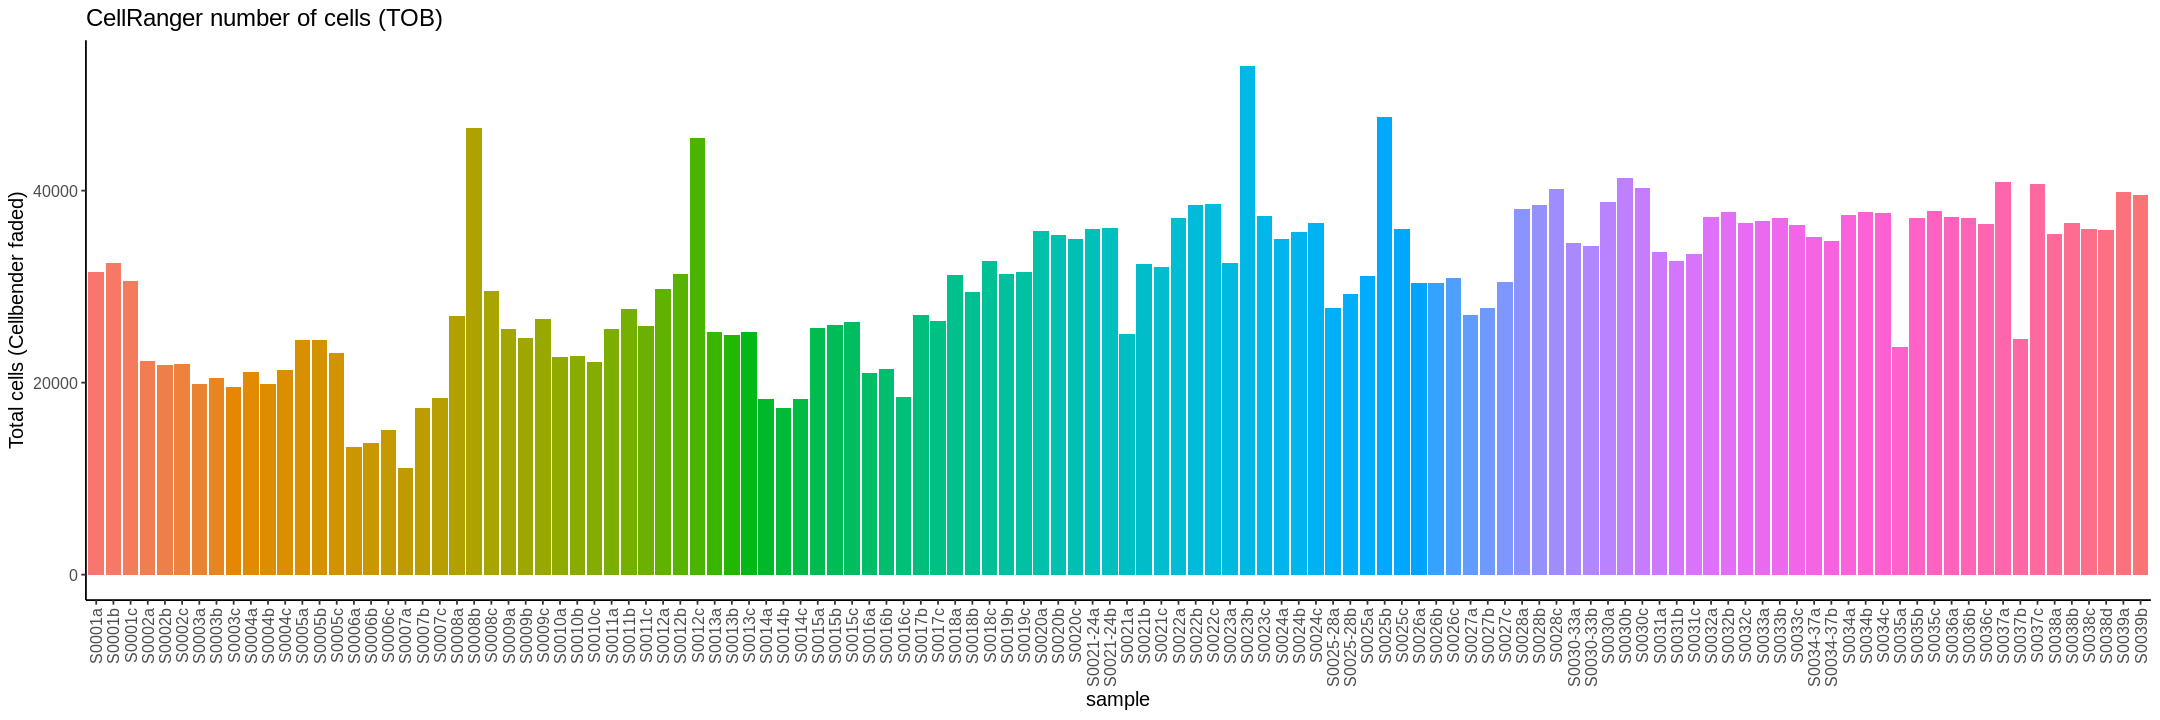

In [11]:
options(repr.plot.width = 18, repr.plot.height = 6)
p = ggplot(df_to_plot1, aes(x=sample, y=cellranger_ncells, fill=sample)) + geom_bar(stat = "identity")
p = p + theme_classic() + theme(text = element_text(size=12))
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1), legend.position = "none")
p1 = p + ylab("Total cells") + ggtitle("CellRanger number of cells (TOB)")
p1

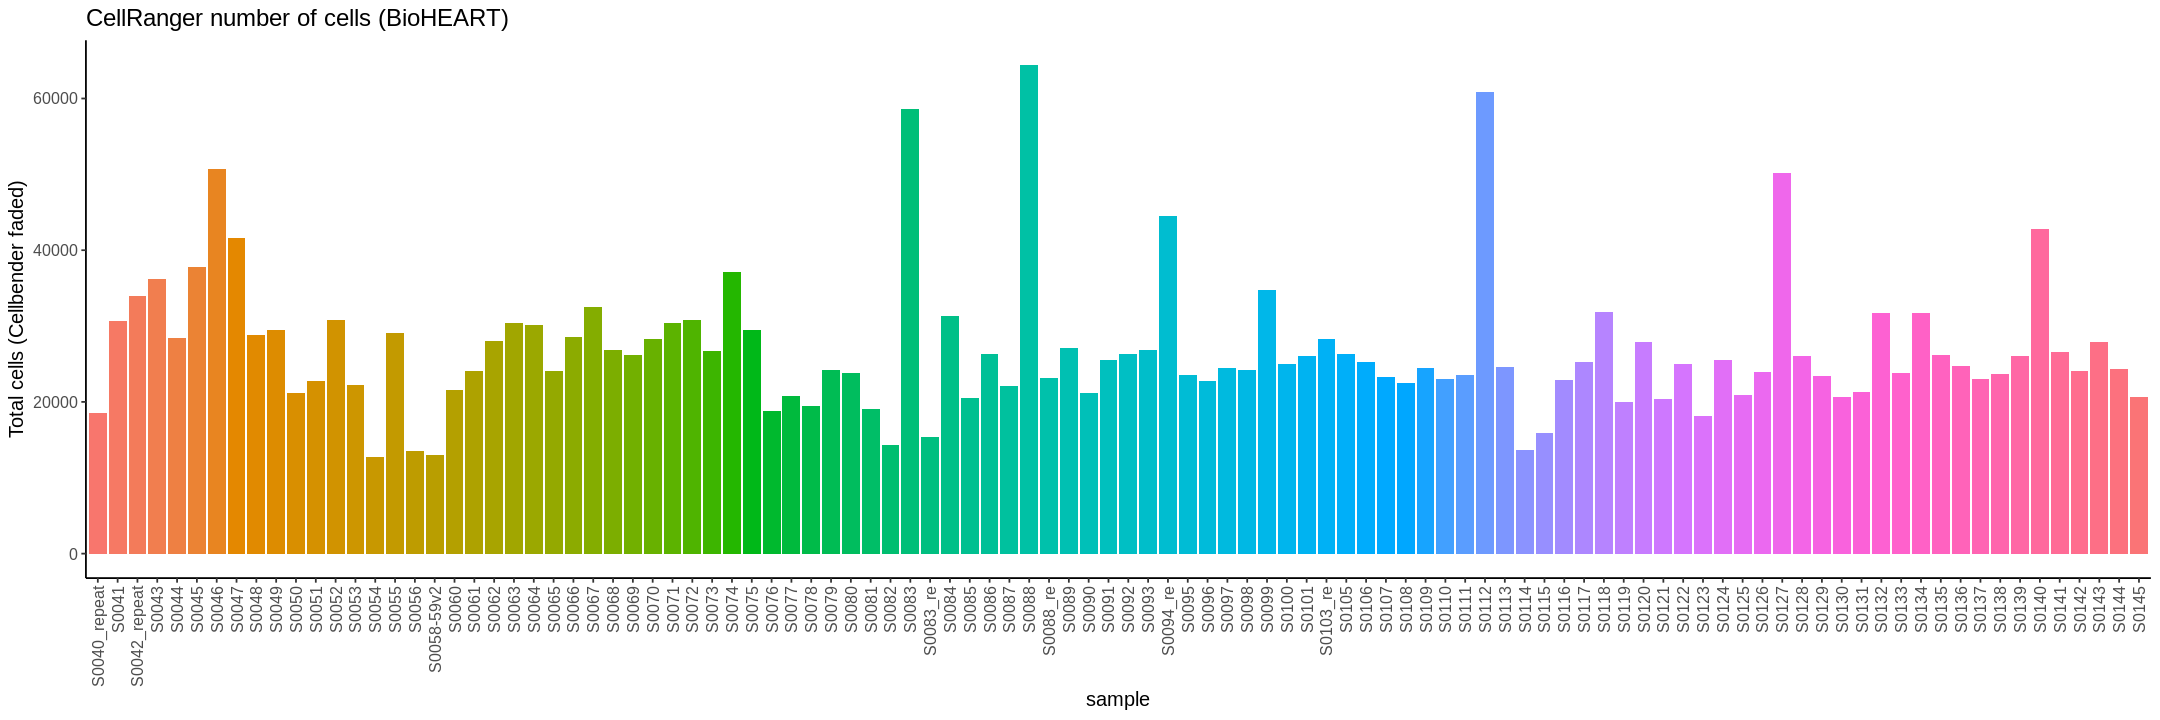

In [12]:
p = ggplot(df_to_plot2, aes(x=sample, y=cellranger_ncells, fill=sample)) + geom_bar(stat = "identity")
p = p + theme_classic() + theme(text = element_text(size=12))
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1), legend.position = "none")
p2 = p + ylab("Total cells") + ggtitle("CellRanger number of cells (BioHEART)")
p2

In [14]:
df_to_save = df_to_plot
df_to_save$cellbender_ncells <- c()
df_to_save$cohort = "TOB"
df_to_save$cohort[121:224] = "BioHEART"
head(df_to_save)

,sample,cellranger_ncells,cohort
,<chr>,<dbl>,<chr>
1,S0001a,31524,TOB
2,S0001b,32419,TOB
3,S0001c,30546,TOB
4,S0002a,22218,TOB
5,S0002b,21849,TOB
6,S0002c,21925,TOB


In [15]:
fwrite(df_to_save, "/share/ScratchGeneral/anncuo/tenk10k/data_processing/cellranger_ncells_summary.csv")

In [17]:
mean(df_to_save$cellranger_ncells)

[1] 28881.03